# Постановка задачи

Рассматривается задача минимизации $$J(u) = \|u\|^2_{\mathbb{H}} + \left<u,a\right>^2_{\mathbb{H}} + \left<u,b\right>_{\mathbb{H}} \rightarrow \inf_{u \in U},  \|a\|_{\mathbb{H}} = \|b\|_{\mathbb{H}} = 1, \langle a, b\rangle_{\mathbb{H}} = 0$$

$$ U = \{u \in \mathbb{H} \ | \ \|u - b\|_{\mathbb{H}} \leq R \}$$

Взяв в качестве начального приближения элемент $ u_0 = a $, решить эту задачу с помощью **метода проекции градиента** с постоянным шагом $\alpha_k = \frac{1}{4}$

In [62]:
import numpy as np

In [63]:
def gradientProjection_method(a, b, J, grad_J, projection, u_0, R, eps, alpha=1/4):
    u_list = []
    u_k = u_0
    
    arg = u_k - alpha*grad_J(u_k)
    proj = projection(arg, b, R)
    
    u_list.append(u_k)
    last_u = u_k
    u_k = proj
    i = 1
    while eps * np.linalg.norm(u_k - u_0) <= np.linalg.norm(u_k - last_u):
        arg = u_k - alpha*grad_J(u_k)
        proj = projection(arg, b, R)

        u_list.append(u_k)
        last_u = u_k
        u_k = proj
        i += 1
    return u_k, i, u_list

# Решение

Возьмем в качестве $a = \left( 0, 1, 0 \right) , b = \left( -1, 0, 0 \right) $. Легко убедиться, что $\|a\|_{\mathbb{H}} = \|b\|_{\mathbb{H}} = 1, \left< a, b\right>_{\mathbb{H}} = 0$.

Радиус шара возьмем $R = 2$.

In [64]:
a = np.array([0, 1, 0])
b = np.array([-1,0, 0])
R = 2
u_0 = a

def J(u):
    return np.linalg.norm(u) ** 2 + np.dot(u,a) ** 2 + np.dot(u,b)

def grad_J(u):
    return 2 * u + 2 * np.dot(u, a) * a + b

def projection(x, center, R):
    if np.linalg.norm(x - center) <= R:
        return x
    else:
        return center + R * (x - center) / np.linalg.norm(x - center)

Рассмотрим следующие значения погрешностей:

* $\varepsilon$ = $10^{-1}$
* $\varepsilon$ = $10^{-4}$
* $\varepsilon$ = $10^{-8}$

In [65]:
eps_list = [1e-1, 1e-4, 1e-8]
res_list = []
for eps in eps_list:
    res = gradientProjection_method(a, b, J, grad_J, projection, u_0, R, eps=eps)
    res_list.append(res)
    print(f"epsilon = {eps}:\n1.u* = {list(res[0])}\n2.J*={J(res[0])}\n3.Количество итераций = {res[1]}\n")

epsilon = 0.1:
1.u* = [0.4375, 0.0, 0.0]
2.J*=-0.24609375
3.Количество итераций = 3

epsilon = 0.0001:
1.u* = [0.49993896484375, 0.0, 0.0]
2.J*=-0.2499999962747097
3.Количество итераций = 13

epsilon = 1e-08:
1.u* = [0.4999999925494194, 0.0, 0.0]
2.J*=-0.24999999999999994
3.Количество итераций = 26



In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

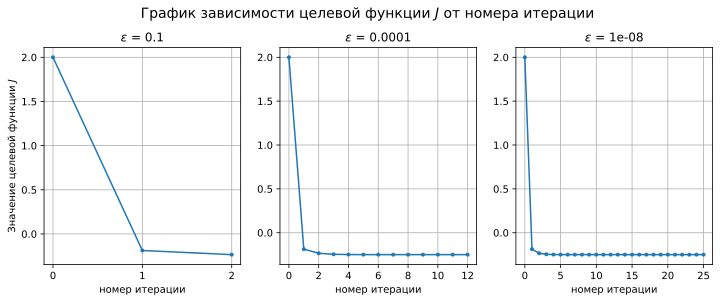

In [68]:
fig, axs = plt.subplots(1, len(res_list), sharex=False, sharey=False, figsize=(12, 4))
fig.suptitle(f'График зависимости целевой функции $J$ от номера итерации', fontsize=14, y=1.02)
for i, res in enumerate(res_list):
    u_list = res[2]
    J_list = [J(u) for u in u_list]
    axs[i].set_title(f'$\\varepsilon$ = {eps_list[i]}')
    axs[i].grid()
    axs[0].set_ylabel(f'Значение целевой функции $J$')
    axs[i].set_xlabel('номер итерации')
    axs[i].plot([i for i in range(res[1])], J_list, marker='.')
    if res[1] > 10 and res[1] < 20:
        axs[i].set_xticks([i for i in range(0,res[1],2)])
    elif res[1] > 20:
        axs[i].set_xticks([i for i in range(0,res[1],5)])
    else:
        axs[i].set_xticks([i for i in range(res[1])])